In [2]:
DATA = r"C:\Users\KIIT\01_ONGC\Intrusion Detection Datasets\Labelled\combined_file.csv"
DATA2 = r"C:\Users\KIIT\01_ONGC\Intrusion Detection Datasets\Labelled\binary2_cleaned_combined_file.csv"
DATA3 = "Multiclass_combined.csv"

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

### Overview of the Dataset

In [5]:
import pandas as pd

# Load the dataset
dataset_path = DATA # Replace this with the actual path to your dataset
df = pd.read_csv(dataset_path)

# Shape of the dataset
print("Shape of the dataset:", df.shape)

# Data types of the columns
print("\nData types of the columns:")
print(df.dtypes)

# Preview the first few rows
print("\nPreview of the dataset:")
print(df.head())

# Summary statistics for numerical features
print("\nSummary statistics for numerical features:")
print(df.describe())

# Counts of unique values for the 'label' column (target variable)
print("\nCounts of unique values for the 'label' column:")
print(df['Label'].value_counts())


Shape of the dataset: (119933, 84)

Data types of the columns:
Flow ID       object
Src IP        object
Src Port       int64
Dst IP        object
Dst Port       int64
              ...   
Idle Mean    float64
Idle Std     float64
Idle Max     float64
Idle Min     float64
Label         object
Length: 84, dtype: object

Preview of the dataset:
                                     Flow ID           Src IP  Src Port  \
0  192.168.136.128-34.237.21.222-39856-443-6  192.168.136.128     39856   
1  192.168.136.128-34.237.21.222-39856-443-6    34.237.21.222       443   
2   192.168.136.128-18.164.215.5-40566-443-6  192.168.136.128     40566   
3   192.168.136.128-52.16.32.113-54208-443-6     52.16.32.113       443   
4   192.168.136.128-52.16.32.113-41496-443-6  192.168.136.128     41496   

            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0    34.237.21.222       443         6  23/01/2024 12:58:07 PM            837   
1  192.168.136.128     39856         6  23

In [7]:
# Check for Null and Missing Values
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

# Calculate the total number of null values in the dataset
total_null_values = null_values.sum()
print("\nTotal number of null values in the dataset:", total_null_values)

# Check for Duplicate Rows
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)

# Identify and count outliers for each numerical column
outliers_count = {}
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_count[column] = len(outliers)

print("\nOutliers count in each numerical column:\n", outliers_count)


Null values in each column:
 Flow ID      0
Src IP       0
Src Port     0
Dst IP       0
Dst Port     0
            ..
Idle Mean    0
Idle Std     0
Idle Max     0
Idle Min     0
Label        0
Length: 84, dtype: int64

Total number of null values in the dataset: 3191

Number of duplicate rows: 948

Outliers count in each numerical column:
 {'Src Port': 0, 'Dst Port': 27512, 'Protocol': 4056, 'Flow Duration': 27743, 'Tot Fwd Pkts': 16641, 'Tot Bwd Pkts': 4318, 'TotLen Fwd Pkts': 4972, 'TotLen Bwd Pkts': 15075, 'Fwd Pkt Len Max': 2441, 'Fwd Pkt Len Min': 2873, 'Fwd Pkt Len Mean': 3069, 'Fwd Pkt Len Std': 1914, 'Bwd Pkt Len Max': 15014, 'Bwd Pkt Len Min': 8040, 'Bwd Pkt Len Mean': 13890, 'Bwd Pkt Len Std': 9465, 'Flow Byts/s': 23577, 'Flow Pkts/s': 26861, 'Flow IAT Mean': 27495, 'Flow IAT Std': 27633, 'Flow IAT Max': 27479, 'Flow IAT Min': 23468, 'Fwd IAT Tot': 24529, 'Fwd IAT Mean': 25137, 'Fwd IAT Std': 27177, 'Fwd IAT Max': 25092, 'Fwd IAT Min': 22949, 'Bwd IAT Tot': 24168, 'Bwd IAT M

### Data Preprocessing

In [12]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and split the dataset
dataset_path = DATA2
df = pd.read_csv(dataset_path)
X = df.drop('Label', axis=1).values
y = df['Label'].values

# Handle infinite and large values
X[np.isinf(X)] = np.finfo('float64').max  # Replace infinite values with a large finite value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Exploratory Data Analysis (EDA) Binary Classification

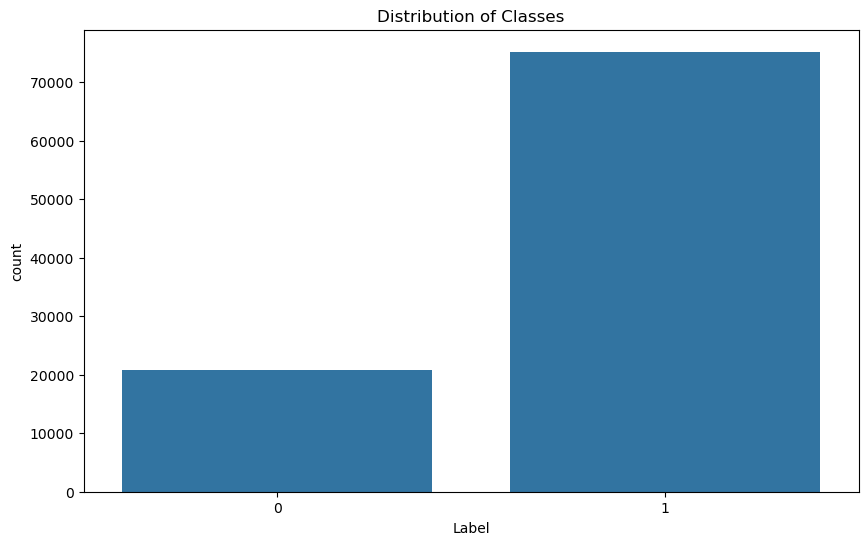

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert X_train back to a DataFrame for easier EDA
feature_names = ['Feature' + str(i) for i in range(X_train.shape[1])]  # Generic feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
y_train_df = pd.DataFrame(y_train, columns=['Label'])

# Combine X_train_df and y_train_df for easier analysis
train_df = pd.concat([X_train_df, y_train_df], axis=1)

# 1. Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=train_df)
plt.title('Distribution of Classes')
plt.show()

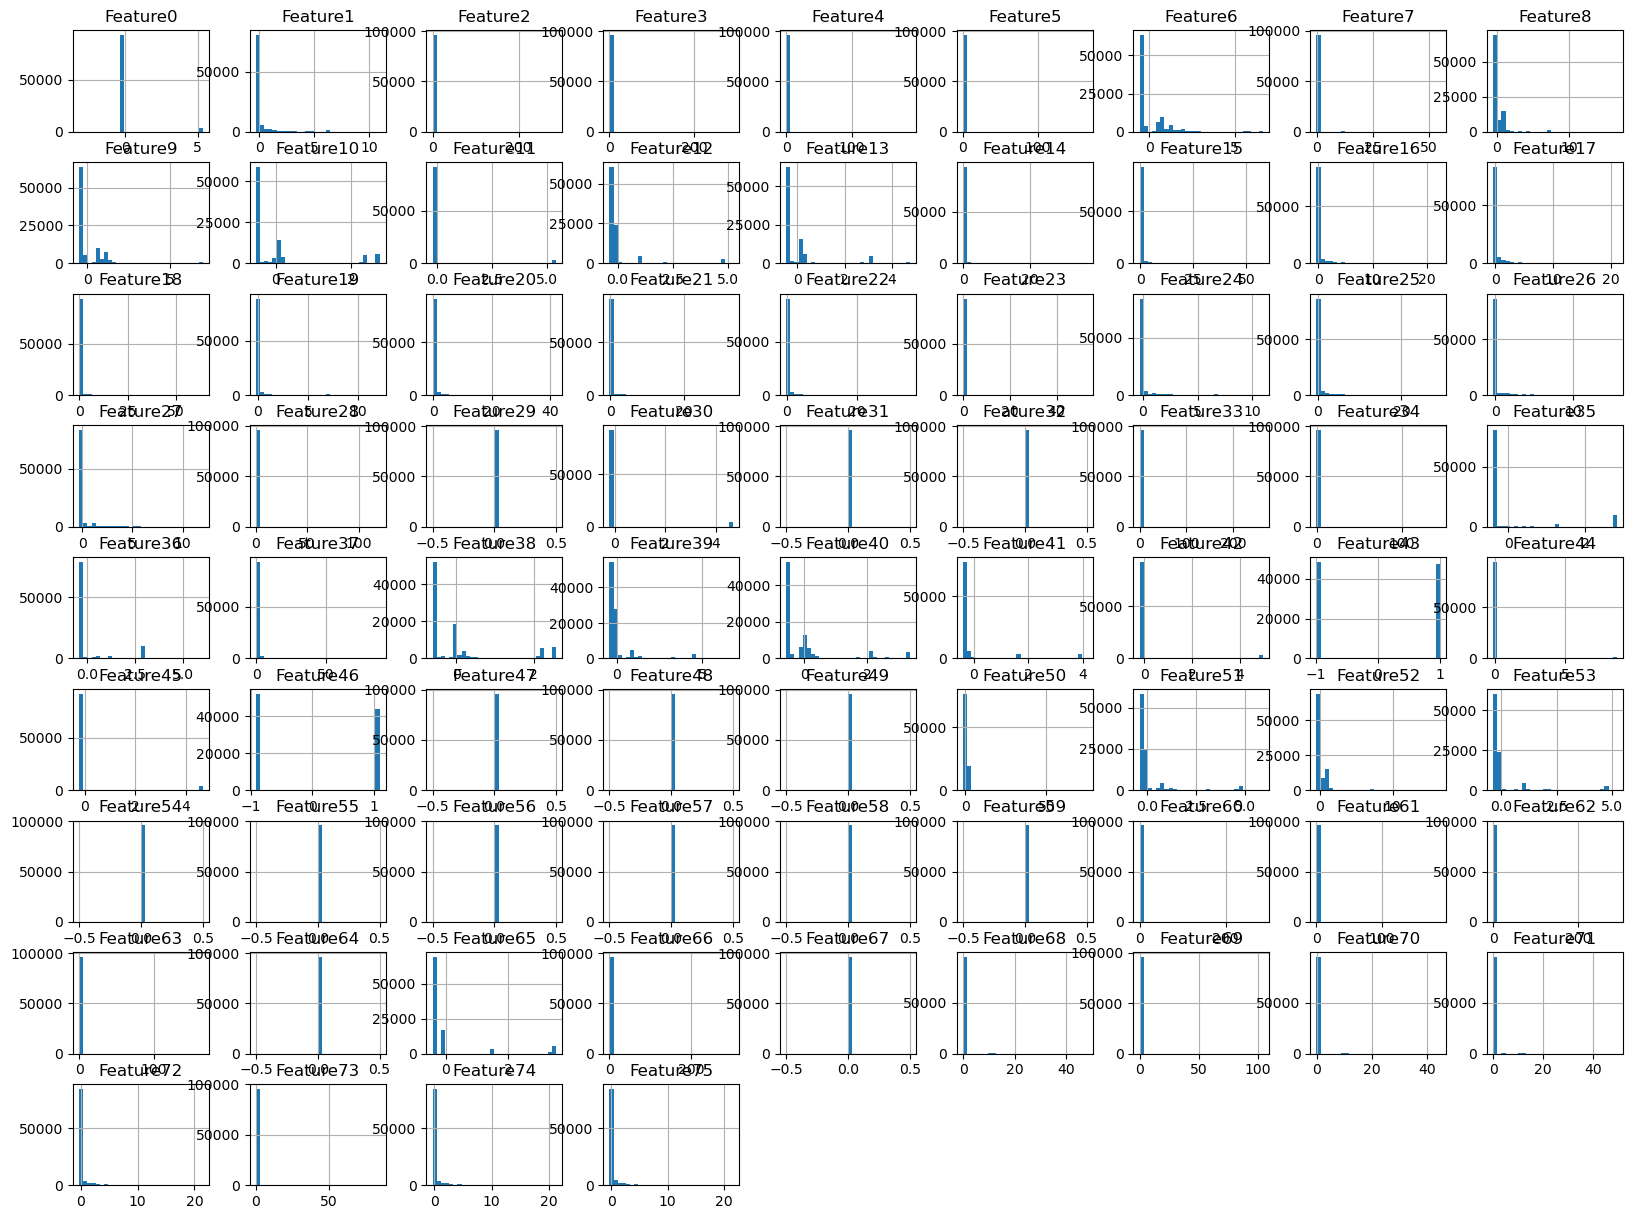

In [15]:
train_df.drop('Label', axis=1).hist(bins=30, figsize=(20, 15))
plt.show()

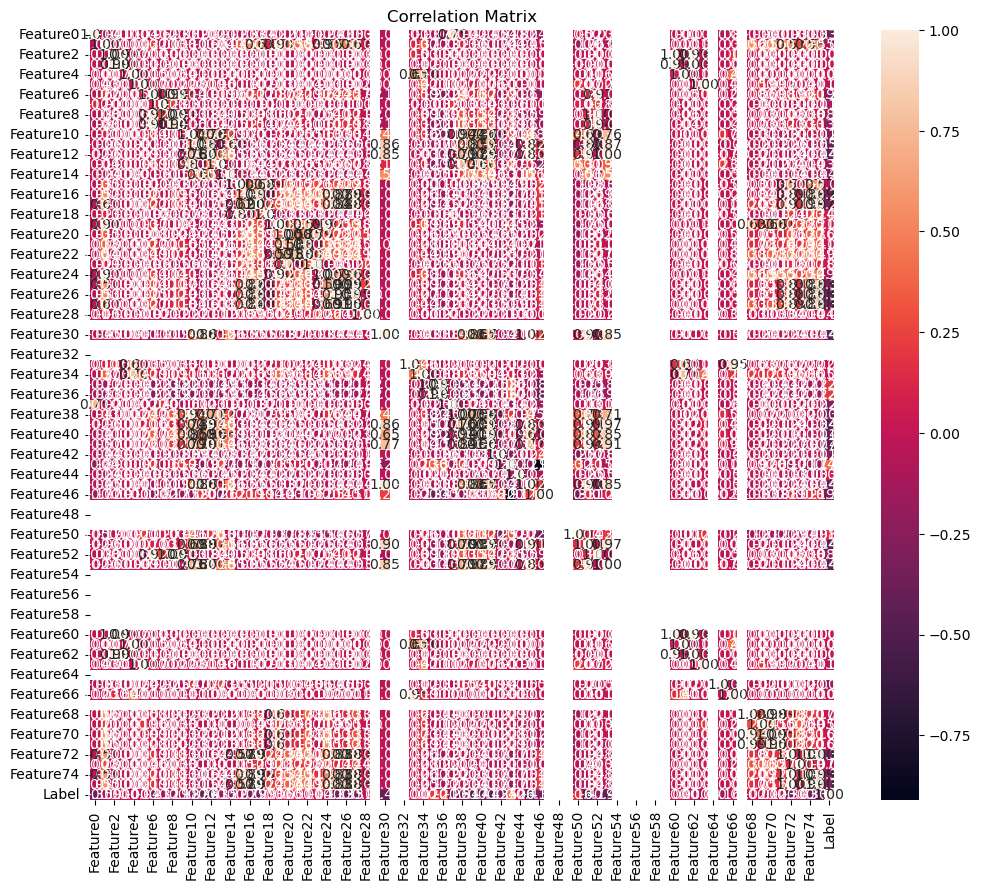

In [20]:
# Calculate correlation matrix for the train_df DataFrame
corr_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Exploratory Data Analysis (EDA) Multi-Classification

In [31]:
import pandas as pd

def modify_label_feature_multiclass(input_file, output_file, columns_to_remove):
    """
    Modify the label feature in the dataset for multiclass classification: each unique label gets a distinct numeric value.

    Parameters:
    - input_file: The path to the input CSV file containing the dataset.
    - output_file: The path to save the modified dataset.
    """
    # Read the dataset from the input CSV file
    df = pd.read_csv(input_file)

     # Remove the specified columns
    df_modified = df.drop(columns=columns_to_remove)
    
    # Use pd.factorize to convert unique strings to unique integers
    df_modified['Label'], label_index = pd.factorize(df_modified['Label'])
    
    # Save the modified dataset to a new CSV file
    df_modified.to_csv(output_file, index=False)
    
    # Print the mapping of labels to integers
    label_mapping = {index: label for label, index in enumerate(label_index)}
    print("Label to numeric mapping:", label_mapping)

# Adjust the file paths as per your environment or requirements
input_file = DATA
output_file = "Multiclass_combined.csv"
columns_to_remove = ['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Src Port', 'Dst Port'] # Replace with actual column names to remove

modify_label_feature_multiclass(input_file, output_file, columns_to_remove)


Label to numeric mapping: {'Benign': 0, 'DDoS_Ripper': 1, 'GoldenEye': 2, 'HOIC': 3, 'Hulk': 4, 'ICMP Flood': 5, 'LOIC_HTTP': 6, 'LOIC_TCP': 7, 'LOIC_UDP': 8, 'RS_l3_ICMP': 9, 'RS_l7_HTTP': 10, 'RS_Scanner': 11, 'Slowloris': 12, 'SYN_Flood': 13, 'TorsHammer': 14, 'Xerxes': 15}


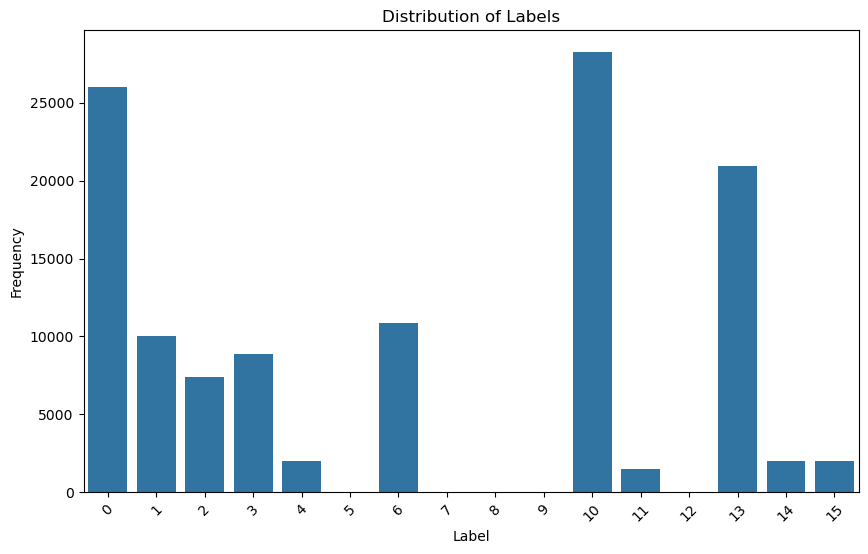

In [6]:
# Load the dataset
df = pd.read_csv(DATA3)

# Plot the distribution of the labels
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

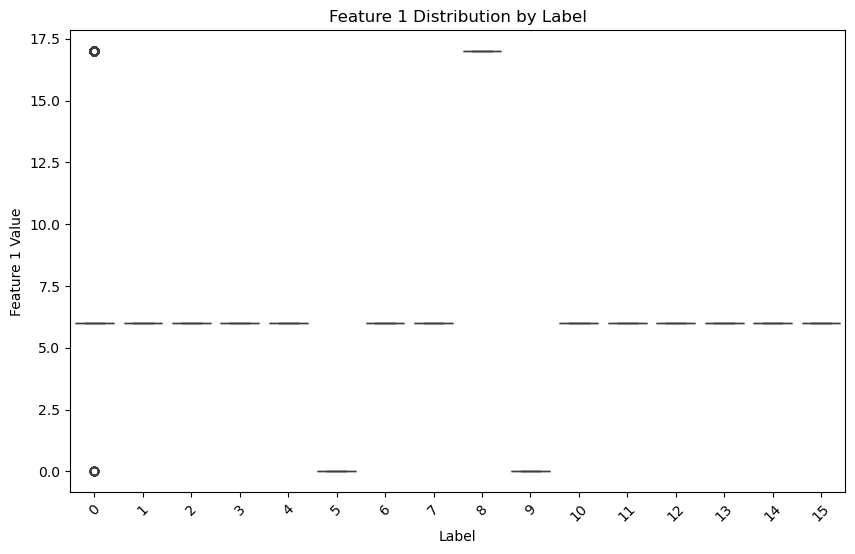

In [7]:
# Example visualization for a single feature
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Protocol', data=df)
plt.title('Feature 1 Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Feature 1 Value')
plt.xticks(rotation=45)
plt.show()

In [8]:
df.head()

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,837,2,2,31.0,46.0,31.0,0.0,15.500000,21.920310,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,274212,2,1,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,6,9497,3,3,517.0,0.0,517.0,0.0,172.333333,298.490089,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,6,2111514,2,6,26.0,398.0,26.0,0.0,13.000000,18.384776,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6,1086117,12,11,1554.0,5969.0,884.0,0.0,129.500000,289.766207,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


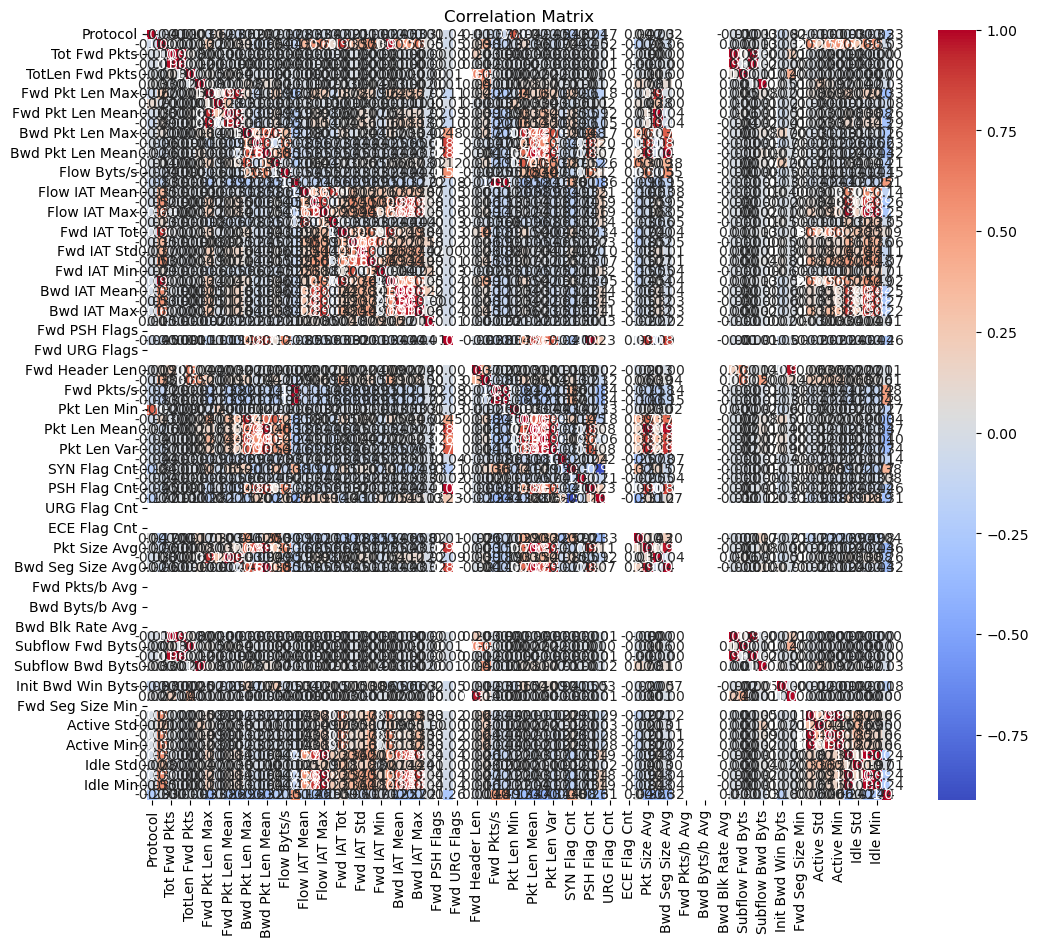

In [35]:
# Compute correlations
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.pairplot(df, hue='Label')
plt.show()

In [4]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and split the dataset
dataset_path = DATA3
df = pd.read_csv(dataset_path)
X = df.drop('Label', axis=1).values
y = df['Label'].values

# Handle infinite and large values
X[np.isinf(X)] = np.finfo('float64').max  # Replace infinite values with a large finite value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert X_train back to a DataFrame for easier EDA
feature_names = ['Feature' + str(i) for i in range(X_train.shape[1])]  # Generic feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
y_train_df = pd.DataFrame(y_train, columns=['Label'])

# Combine X_train_df and y_train_df for easier analysis
train_df = pd.concat([X_train_df, y_train_df], axis=1)

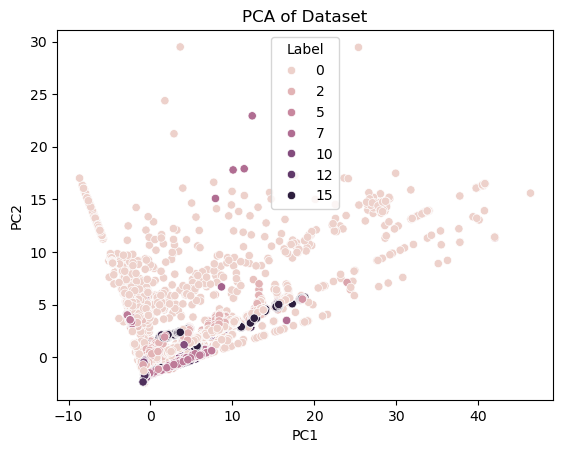

In [7]:
from sklearn.decomposition import PCA

# Assuming 'df' has all numerical features and 'labels' is your target variable
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_df.drop('Label', axis=1))
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

finalDf = pd.concat([principalDf, train_df[['Label']]], axis=1)

sns.scatterplot(x='PC1', y='PC2', hue='Label', data=finalDf)
plt.title('PCA of Dataset')
plt.show()


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 95946 samples in 0.038s...
[t-SNE] Computed neighbors for 95946 samples in 52.240s...
[t-SNE] Computed conditional probabilities for sample 1000 / 95946
[t-SNE] Computed conditional probabilities for sample 2000 / 95946
[t-SNE] Computed conditional probabilities for sample 3000 / 95946
[t-SNE] Computed conditional probabilities for sample 4000 / 95946
[t-SNE] Computed conditional probabilities for sample 5000 / 95946
[t-SNE] Computed conditional probabilities for sample 6000 / 95946
[t-SNE] Computed conditional probabilities for sample 7000 / 95946
[t-SNE] Computed conditional probabilities for sample 8000 / 95946
[t-SNE] Computed conditional probabilities for sample 9000 / 95946
[t-SNE] Computed conditional probabilities for sample 10000 / 95946
[t-SNE] Computed conditional probabilities for sample 11000 / 95946
[t-SNE] Computed conditional probabilities for sample 12000 / 95946
[t-SNE] Computed conditional probabilities for s

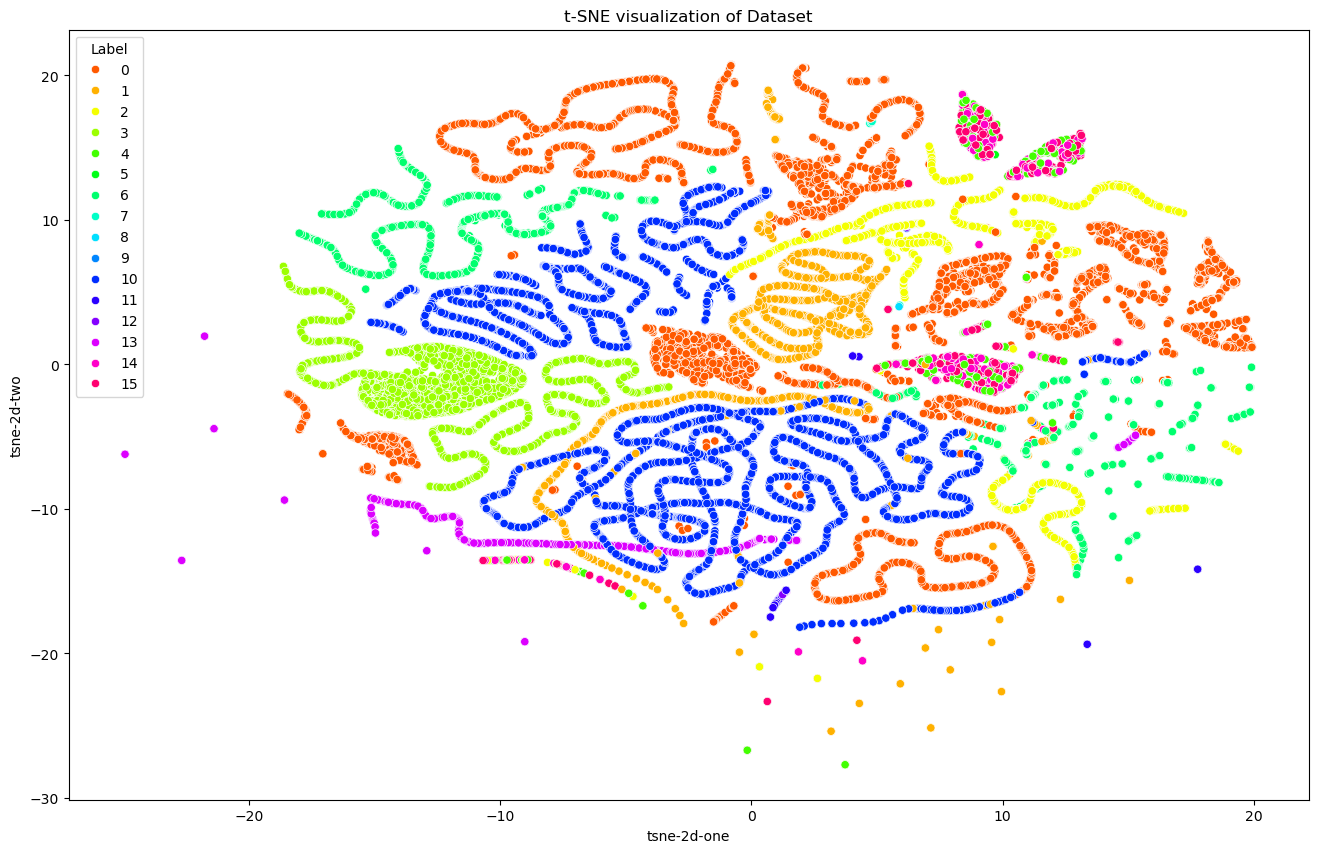

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(train_df.drop('Label', axis=1))

df_tsne = train_df.copy()
df_tsne['tsne-2d-one'] = tsne_results[:,0]
df_tsne['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="Label", data=df_tsne, legend="full", palette=sns.color_palette("hsv", len(train_df['Label'].unique())))
plt.title('t-SNE visualization of Dataset')
plt.show()


In [11]:
train_df.head()

,Feature0,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,...,Feature67,Feature68,Feature69,Feature70,Feature71,Feature72,Feature73,Feature74,Feature75,Label
0,-0.185477,6.417323,0.038681,0.030647,0.050017,-0.033515,0.944773,-0.066146,-0.025864,0.306147,...,0.0,4.581182,-0.036738,4.288599,4.745354,2.093993,-0.051141,2.068400,2.109683,14
1,-0.185477,-0.313328,-0.006415,-0.006651,-0.011452,-0.033515,-0.548980,-0.066146,-0.463770,-0.503730,...,0.0,-0.094266,-0.036738,-0.094326,-0.091822,-0.295930,-0.051141,-0.296297,-0.294564,10
2,-0.185477,-0.312120,-0.006415,-0.006651,-0.011452,-0.033515,-0.548980,-0.066146,-0.463770,-0.503730,...,0.0,-0.094266,-0.036738,-0.094326,-0.091822,-0.295930,-0.051141,-0.296297,-0.294564,10
3,-0.185477,-0.315018,-0.006415,-0.006651,-0.011452,0.034560,-0.548980,-0.066146,-0.463770,-0.503730,...,0.0,-0.094266,-0.036738,-0.094326,-0.091822,-0.295930,-0.051141,-0.296297,-0.294564,0
4,-0.185477,-0.314820,-0.005494,-0.002921,-0.004530,-0.019974,0.484776,-0.066146,0.769019,0.708317,...,0.0,-0.094266,-0.036738,-0.094326,-0.091822,-0.295930,-0.051141,-0.296297,-0.294564,10


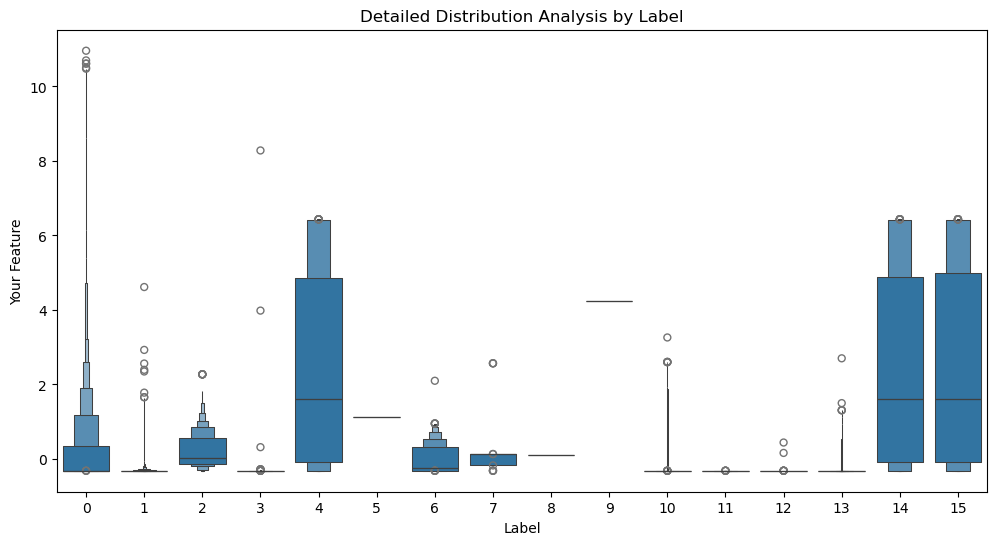

In [12]:
plt.figure(figsize=(12, 6))
sns.boxenplot(x='Label', y='Feature1', data=train_df)
plt.title('Detailed Distribution Analysis by Label')
plt.xlabel('Label')
plt.ylabel('Your Feature')
plt.show()